In [ ]:
# magic! (don't worry about this)
%load_ext autoreload
%autoreload 2
#%matplotlib inline

In [ ]:
# let us import some useful things
from lib import *
from classifiers import *
from numpy import mean
#from graphs import *
from sklearn import tree
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter
import math


Sally sends you a picture of a dress that she has just found. Excited, you text back "Did you buy it?" and she asks you to guess whether she bought the dress or not. You know Sally very well, What is your thought process on whether Sally bought the dress or not? 

Draw up this process.

Lets run an example through this: 

## What is a tree? 

How to make a tree (hand-wavy algorithm):
    1. Find the best feature to divide on (this is the hard part)
    2. Divide on x_p and assign training samples to each leaf. 
    3. If the leaf is "pure" stop. Otherwise iterate over


### How to choose this x_p

#### What type of variables we have
    1. Continuous 
    2. Ordinary
    3. Nominal
    
Can you give some examples of each variable types?




### Entropy
$S = - \sum_i \log(p_i) p_i$

Maximized at $p_i = \frac{1}{n_c}$

In [ ]:
p = np.linspace(0.001,1,500)
y = - np.log(p)*p
plt.plot(p,y)
plt.show()

### Gini index

![:(](https://nicfoley.files.wordpress.com/2013/07/genie.jpg)

$I = \sum_i p_i (1-p_i)$

This is maximized at $p_i = \frac{1}{n_c}$ where $n_c$ is the number of classes  

In [ ]:
p = np.linspace(0,1,500)
y = (1-p)*p
plt.plot(p,y)
plt.show()

The cost after splitting is the weighted cost of each node. 

The idea for choosing the branch to split on is to split on the attribute witht he biggest improvment in purity. This is a greedy way to build the tree (Why? Can we construct an example where this greedy method doesn't work?)


Let's go back to how to deal with different types of variables. 

For continous variables, and ordinal variables: we choose a particular position (any ideas how to do this for continuous variables?) For nominal variables, we have n! combinations to choose from :( (this could be prohibitively large but there are tricks to deal with it)

After the tree is constructed, it will need to be pruned to prevent overfitting. 

Why trees: 
    1. They are easy to understand (interpretable)
    2. They have ways of dealing with missing data 
    3. They are fairly good at classifying (but it can get better)
    4. Cost of prediction is low (this is not very important for us)
    5. Can do variable selection to some extent 
    6. Natural to use for all kinds of features 

In [206]:
# load the data same as before
microarray_file_name = '../data/leukemia_ALL_AML_matrix.txt'
labels_file_name = '../data/leukemia_ALL_AML_labels.txt'
data_store = DataSet(microarray_file_name, labels_file_name)

In [ ]:
# This train function is *almost* the same as the train method that 
# your knn classifier. The difference is that this is a function that
# takes as one of the parameters the decision tree, so it will be called
# like: train(decision_tree, train_samples)

def train(classifier, train_samples):
    feature_array = [sample.get_gene_profile() for sample in train_samples]
    labels = [sample.get_label() for sample in train_samples]
    classifier.fit(feature_array, labels)

def classify(classifier, test_samples):
    labelled_samples = []
    feature_array = [sample.get_gene_profile() for sample in test_samples]
    results = classifier.predict(feature_array)
    labelled_samples = [(test_samples[i], results[i]) for i in range(len(test_samples))]
    return labelled_samples


In [ ]:
# Here, you can set criterion = "entropy" or "gini", which will determine
# what equation the decision tree will use to measure the quality of a split
#
# You can set max_features=None, "sqrt", or "log2", which will determine how many
# features the decision tree will use. Setting it to None will use all the features,
# sqrt will use sqrt(number of features) and log2 will use log2(number of features)
#
# Play around! What settings are best? Do they change for the different data sets?
decision_tree = tree.DecisionTreeClassifier(criterion="entropy", max_features=None)
train(decision_tree, data_store.get_train_set())

classified_samples = classify(decision_tree, data_store.get_test_set())
# let's evaluate how well the classifier worked
evaluate_results(classified_samples)
#compare this final answer with your neighbor. did you get the same answer? 

In [ ]:
#plot_errors(classified_samples)

In [ ]:
def bootstrap(data):
    N = len(data)
    sample = np.random.choice(N, N)
    return [data[i] for i in sample]

def bagTrain(ntrees):
    myTrees = []
    for i in range(ntrees):
        decision_tree = tree.DecisionTreeClassifier(criterion="entropy", max_features=None)
        train(decision_tree, bootstrap(data_store.get_train_set()))
        classified_samples = classify(decision_tree, data_store.get_test_set())
        print("Tree " + str(i)) 
        evaluate_results(classified_samples)
        myTrees.append(decision_tree)
    return myTrees

def bagClassify(myTrees, test_samples):
    classification = []
    for sample in test_samples:
        judgment = []
        #use the trees you stored to classify and store the results in judgement
        for tree in myTrees:
            judgment.append(classify(tree, [sample]))
        judgment = [item[0][1] for item in judgment]
        #TODO: find the most common vote (most_common_vote)? 
        #what should you do if there is tie?
        # **your code here***
        
        
        classification.append([sample, most_common_vote])
    return classification
    


In [ ]:
myTrees = bagTrain(5)
classes = bagClassify(myTrees, data_store.get_test_set())
print("***Final:***")
evaluate_results(classes)

Run the regular tree and the bagged tree multiple times. What do you notice? 

In [ ]:
# load another dataset (kidney cancer)
# this datasets have 90 normal tissues (label: -1) and 91 cancer tissues (label: 1).
# BIG dataset, 36864 genes are measured! 

microarray_file_name = '../data/Renal_cell_carcinoma_Matrix.txt'
labels_file_name = '../data/Renal_cell_carcinoma_label-11.txt'
data_store = DataSet(microarray_file_name, labels_file_name)


## now play the above methods again and report the accuracy 



In [ ]:
# Random forrest
from sklearn.ensemble import RandomForestClassifier
# let's grow 1000 trees
clf = RandomForestClassifier(n_estimators=1000)
train(clf, data_store.get_train_set())
classified_samples=classify(clf, data_store.get_test_set())
evaluate_results(classified_samples)

Lung cancer dataset: five classes (4 tumors and normalm, 2308 genes):  
0. adenocarcinoma (AD): 139 samples  
1. normal lung (NL): 17 samples  
2. small cell lung cancer (SMCL): 6 samples  
3. squamous cell carcinoma (SQ): 21 samples  
4. pulmonary carcinoid (COID): 20 samples 

In [ ]:
# load the kidney dataset back again
# this datasets have 90 normal tissues (label: -1) and 91 cancer tissues (label: 1).
microarray_file_name = '../data/lung_normal_4tumors_matrix.txt'
labels_file_name = '../data/lung_normal_4tumors_labels.txt'
data_store = DataSet(microarray_file_name, labels_file_name)



In [366]:
## now we are going to do hierarchical clustering

def hier_cluster_single(data_list, distance_metric, step = 1, method = "average"):
    # at the beginning, every sample is of its own cluster
    clusters = [[x] for x in data_list]
    
    # distances is a list of tuples
    # tuples has the format of (distance, (sample_1, sample_2))
    distances = []
    
    
    # define a new distance function
    def min_distance(cls_a, cls_b, distance_metric):
        min_dist = math.inf
        for a in cls_a:
            for b in cls_b:
                current_dist = distance_metric(a.get_gene_profile(),b.get_gene_profile())
                if min_dist > current_dist:
                    min_dist = current_dist
        return min_dist
    
    def avg_distance(cls_a, cls_b, distance_metric):
        total_dist = 0
        count = 0
        
        # TODO: finish the avg_distance function here
        # **your code here***
                
        return (total_dist/count)
        
    if method == "average":
        distance_function = avg_distance
    elif method == "single":
        distance_function = min_distance
    else:
        print("unknown method")
        exit(1)
    
    
    # now we calculate every pairwise distance
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            cls_a = clusters[i]
            cls_b = clusters[j]
            distances.append((distance_function(cls_a, cls_b, distance_metric), \
                              (cls_a, cls_b)))

    
    for k in range(step):
        print("step: " + str(k) + "\t # clusters: " + str(len(clusters)))

        # get the min distance and merge
        distances.sort(key=lambda x: x[0])
        to_be_merged = distances[0][1]
        
        # update cluster
        clusters.remove(to_be_merged[0])
        clusters.remove(to_be_merged[1])    
    
        # remove old distances 
        new_distances = distances.copy()
        # TODO: check if the distances involves samples in to_be_merged
        # delete all of them (in the new_distances copy, not the original one)
        # we will add distances back later
        # **your code here***
        
        
        distances = new_distances

        # add in new distances to the merged class
        cls_b = to_be_merged[0] + to_be_merged[1]
        
        # TODO: now add distances between the new cluster (cls_b) and 
        # every cluster in clusters
        # **your code here***    
        
        
        
        # update clusters
        clusters.append(to_be_merged[0] + to_be_merged[1])
    
    return(clusters)

    
# get your distance functions from KNN
def my_euclidean_distance(sample_profile1, sample_profile2):
    distance = 0.0
    #return distances
    return reduce(lambda x, y: x+y, [(sample_profile1[i]- sample_profile2[i])**2 \
                                      for i in range(len(sample_profile1))])

In [367]:
a = list(range(10))
print(a)
b = [3,4,5,7]

remove_idx = a.copy()
for i in a:
    if i in b:
        remove_idx.remove(i)
        
print(remove_idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 6, 8, 9]


Now we give it a try

In [369]:
# we want to aggregate all the data 
all_data = data_store.get_train_set()+data_store.get_test_set()

#hier_cluster_single(all_data, my_euclidean_distance)

# let's do 10 steps
my_clusters = hier_cluster_single(all_data, my_euclidean_distance, 10)

for c in my_clusters:
    print("Cluster of length " + str(len(c)))
    for s in c:
        print(s)

step: 0	 # clusters: 72
step: 1	 # clusters: 71
step: 2	 # clusters: 70
step: 3	 # clusters: 69
step: 4	 # clusters: 68
step: 5	 # clusters: 67
step: 6	 # clusters: 66
step: 7	 # clusters: 65
step: 8	 # clusters: 64
step: 9	 # clusters: 63
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sample with label: 0
Cluster of length 1
Sample with label: 1
Cluster of length 1
Sa

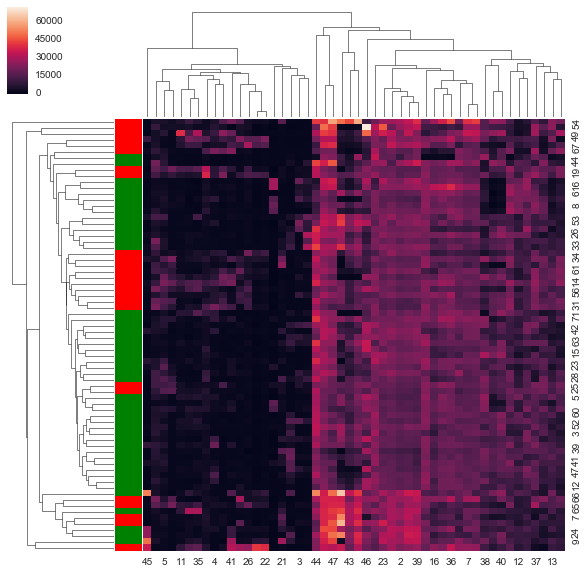

In [361]:
import seaborn as sns; sns.set()

K = 50
# we want to aggregate all the data 
all_data = data_store.get_train_set()+data_store.get_test_set()

# first we exact all the gene profiles and put them in a matrix
gene_profile = [x.get_gene_profile() for x in all_data]
gene_profile = np.array(gene_profile)

# calculate the variance of the genes and get the top K
gene_var = [np.var(gene_profile[:,x]) for x in range(np.shape(gene_profile)[1])]
top_k_genes = gene_profile[:,np.argsort(gene_var)[-K:]]

# make a hierarchically-clustered heatmap
# label 1 is red and other lables are green
ax = sns.clustermap(top_k_genes, method='average',metric='euclidean',\
                   row_colors = ['r' if x.get_label() == 1 else 'g' for x in all_data])

# try different method ("single", "average", "complete")
# try different metric ("euclidean", "cityblock" (which is the L1 distance))